In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Industry_Portfolios.xlsx contains monthly nominal (net) returns for ten industry portfolios (expressed as percentages, but without "%"), over the ten-year period from Jan 2004 through Dec 2013.

In [2]:
# Load an existing .xlsx file
df = pd.read_excel('Industry_Portfolios.xlsx', index_col="Date")

E:\software\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


# 1.1. Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

In [3]:
mean_sd = pd.DataFrame({"mean":df.mean(), "standard_deviation": df.std()})

In [4]:
mean_sd

,mean,standard_deviation
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


# 1.2. Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios.
This graph must have expected (monthly) return on the vertical axis and standard deviation of (monthly) return on the horizontal axis.

This graph must cover the range from 0% to 2% on the vertical axis, in increments of 0.1% (or less).


In [5]:
#1.calculate n*n covariance maxix of return

In [6]:
V = df.cov()

In [7]:
#2.calcuate alpha=R'V^(-1)e zeta=R'V^(-1)R delta=e'V^(-1)e 

In [8]:
V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)
R = mean_sd["mean"]
e = pd.Series([1]*10)
e.index = R.index

In [9]:
alpha = R.dot(V_inv).dot(e)
alpha

0.1379432386993189

In [10]:
zeta = R.dot(V_inv).dot(R)
zeta

0.19640858464482275

In [11]:
delta = e.dot(V_inv).dot(e)

In [12]:
R_mv = alpha/delta

In [13]:
R_p = np.linspace(0, 2, 100) 

sigma_p = np.sqrt(1/delta + delta/(zeta*delta-alpha**2)*(R_p-R_mv)**2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


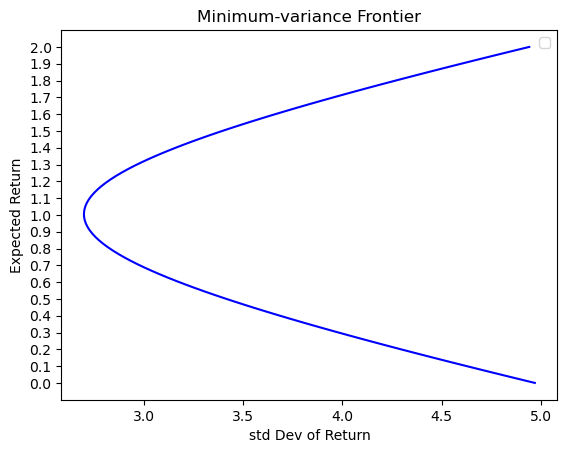

In [14]:
plt.plot(sigma_p, R_p, color='blue', linestyle='-')

plt.yticks(np.arange(0, 2.1, 0.1))
plt.xlabel('std Dev of Return')
plt.ylabel('Expected Return')
plt.title('Minimum-variance Frontier')
plt.legend()
plt.show() 

# 1.3. Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.

Minimum-variance frontier represents outermost envelope of attainable portfolios ⇒ no attainable portfolio exists on the left of the minimum-variance frontier.


# 2. Now suppose that the (net) risk-free rate is 0.13% per month:

# 2.1. Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.

In [15]:
R_f = 0.13
R_p = np.linspace(0, 2, 100) 
R_p_riskless = np.linspace(0, 2, 100) 

R_p = R_mv + np.sqrt((sigma_p**2-1/delta)*(zeta*delta-alpha**2)/delta)
sigma_p_riskless = (R_p_riskless-R_f)/np.sqrt(zeta - 2*alpha*R_f + delta*(R_f**2))

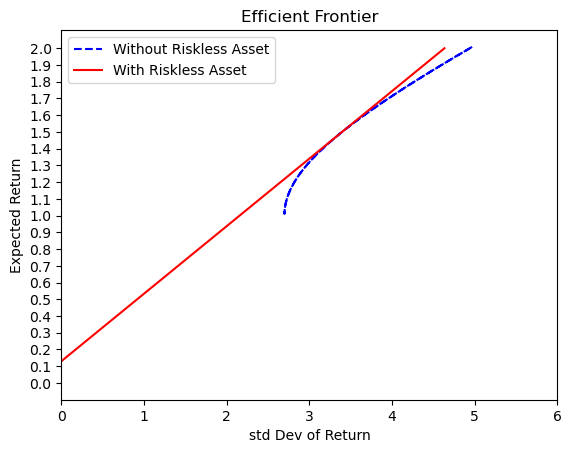

In [16]:
plt.plot(sigma_p, R_p, color='blue', linestyle='--', label = "Without Riskless Asset")
plt.plot(sigma_p_riskless, R_p_riskless, color='red', linestyle='-', label = "With Riskless Asset")

plt.yticks(np.arange(0, 2.1, 0.1))
plt.xlim(0,6)
plt.xlabel('std Dev of Return')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show() 

# 2.2. Briefly explain the economic significance and relevance of the efficient frontier to an investor.

Efficient frontier consists of portfolios with highest potential reward for given amount of risk ⇒ risk-averse investor must invest in (optimal) portfolio on efficient frontier to maximise expected utility.

# 3 The two frontiers will intersect at single point: the tangency portfolio:

# 3.1. Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.


In [17]:
sharpe_ratio = np.sqrt(zeta - 2*alpha*R_f + delta*R_f**2)

In [18]:
sharpe_ratio

0.4035655993495088

In [19]:
R_tg = (alpha*R_f - zeta)/(delta*R_f - alpha)
R_tg

1.4862735358446912

In [20]:
a = (zeta*V_inv.dot(e)-alpha*V_inv.dot(R))/(zeta*delta-alpha**2)
b = (delta*V_inv.dot(R) - alpha*V_inv.dot(e))/(zeta*delta-alpha**2)
w_star = a + b*R_tg

In [21]:
w_star

NoDur    0.567972
Durbl   -0.214073
Manuf    0.714105
Enrgy    0.104087
HiTec   -0.363438
Telcm   -0.095463
Shops    0.991647
Hlth     0.075570
Utils    0.132643
Other   -0.913051
dtype: float64

# 3.2. Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

Tangency portfolio has the highest possible Sharpe ratio.